In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()


In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df=pd.DataFrame(iris["data"],columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df["target"]=iris.target

In [13]:
df["flower_name"]=df["target"].apply(lambda x: iris["target_names"][x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
from sklearn.model_selection import train_test_split
x=df.drop(["target","flower_name"],axis="columns")

In [20]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)


In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=60)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60)

In [38]:
model.score(X_test,y_test)*100

93.33333333333333

In [41]:
from sklearn.metrics import confusion_matrix
y_predict=model.predict(X_test)
y_predict

array([0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1,
       2, 2, 1, 2, 0, 0, 2, 1])

In [43]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[ 6,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 11]], dtype=int64)

TypeError: set_theme() got an unexpected keyword argument 'xlabel'

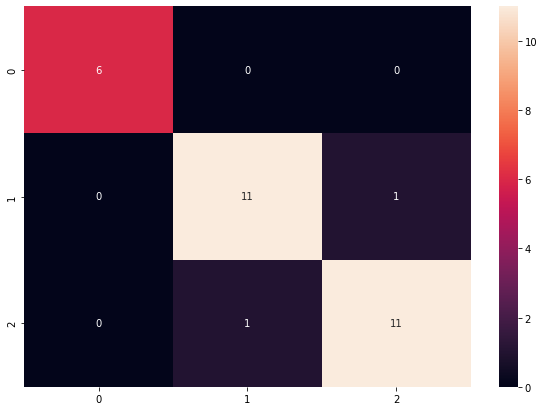

In [56]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))

sn.heatmap(cm,annot=True)
sn.set_(xlabel="Truth",ylabel="Predicted")
